In [2]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   

In [3]:
df = pd.read_csv("crime_data.csv")

df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
#renaming columns

df = df.rename( columns={'Unnamed: 0':'State'})

df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Exploratory Data Analysis

In [5]:
df.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<IPython.core.display.Javascript object>

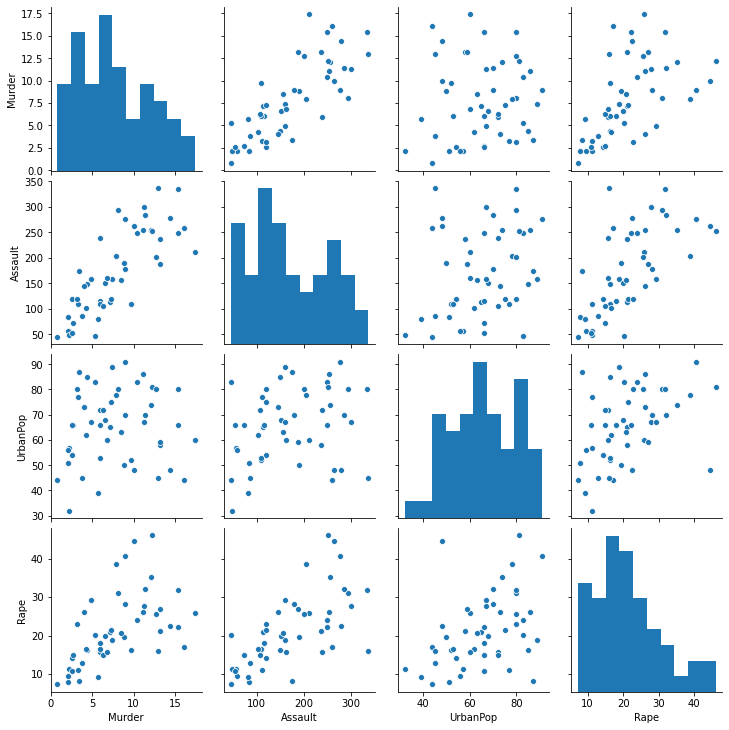

In [8]:
sns.pairplot(df)

From the above plot we can observe that all the crimes have a linear relationship with each other.

<IPython.core.display.Javascript object>

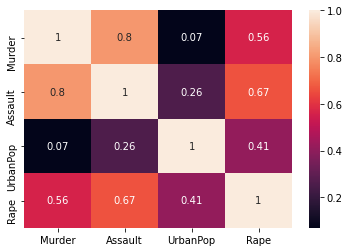

In [9]:
sns.heatmap(df.corr(), annot=True)

We can observe that Assalut is positively correlated with Murder and Rapes.

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

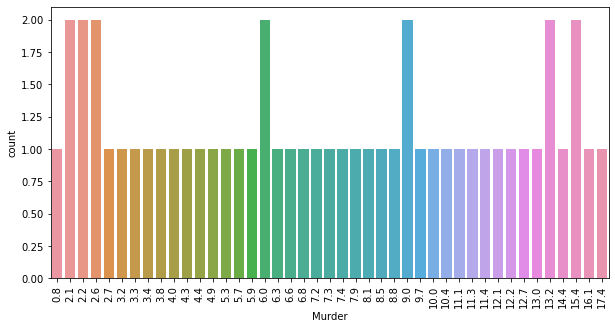

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(df['Murder'])
plt.xticks(rotation=90)

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

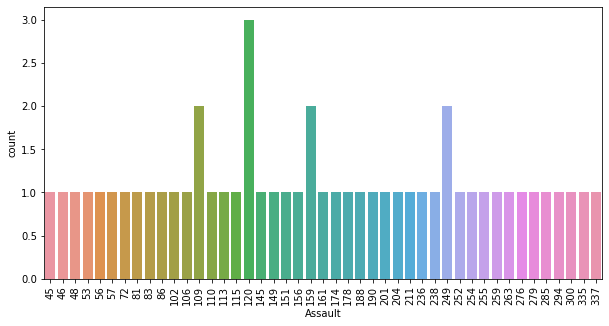

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(df['Assault'])
plt.xticks(rotation=90)

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

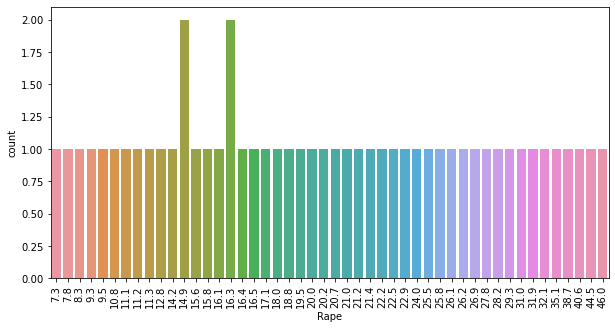

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(df['Rape'])
plt.xticks(rotation=90)

In [13]:
df1 = df.drop(['State'],axis=1)   
df2 = df1.drop(['UrbanPop'],axis=1)  

df2.head()

,Murder,Assault,Rape
0,13.2,236,21.2
1,10.0,263,44.5
2,8.1,294,31.0
3,8.8,190,19.5
4,9.0,276,40.6


# Splitting data

In [14]:
array=df2.values
array 

array([[ 13.2, 236. ,  21.2],
       [ 10. , 263. ,  44.5],
       [  8.1, 294. ,  31. ],
       [  8.8, 190. ,  19.5],
       [  9. , 276. ,  40.6],
       [  7.9, 204. ,  38.7],
       [  3.3, 110. ,  11.1],
       [  5.9, 238. ,  15.8],
       [ 15.4, 335. ,  31.9],
       [ 17.4, 211. ,  25.8],
       [  5.3,  46. ,  20.2],
       [  2.6, 120. ,  14.2],
       [ 10.4, 249. ,  24. ],
       [  7.2, 113. ,  21. ],
       [  2.2,  56. ,  11.3],
       [  6. , 115. ,  18. ],
       [  9.7, 109. ,  16.3],
       [ 15.4, 249. ,  22.2],
       [  2.1,  83. ,   7.8],
       [ 11.3, 300. ,  27.8],
       [  4.4, 149. ,  16.3],
       [ 12.1, 255. ,  35.1],
       [  2.7,  72. ,  14.9],
       [ 16.1, 259. ,  17.1],
       [  9. , 178. ,  28.2],
       [  6. , 109. ,  16.4],
       [  4.3, 102. ,  16.5],
       [ 12.2, 252. ,  46. ],
       [  2.1,  57. ,   9.5],
       [  7.4, 159. ,  18.8],
       [ 11.4, 285. ,  32.1],
       [ 11.1, 254. ,  26.1],
       [ 13. , 337. ,  16.1],
       [  

# Scaling Data

In [15]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X  

array([[ 1.25517927,  0.79078716, -0.00345116],
       [ 0.51301858,  1.11805959,  2.50942392],
       [ 0.07236067,  1.49381682,  1.05346626],
       [ 0.23470832,  0.23321191, -0.18679398],
       [ 0.28109336,  1.2756352 ,  2.08881393],
       [ 0.02597562,  0.40290872,  1.88390137],
       [-1.04088037, -0.73648418, -1.09272319],
       [-0.43787481,  0.81502956, -0.58583422],
       [ 1.76541475,  1.99078607,  1.1505301 ],
       [ 2.22926518,  0.48775713,  0.49265293],
       [-0.57702994, -1.51224105, -0.11129987],
       [-1.20322802, -0.61527217, -0.75839217],
       [ 0.60578867,  0.94836277,  0.29852525],
       [-0.13637203, -0.70012057, -0.0250209 ],
       [-1.29599811, -1.39102904, -1.07115345],
       [-0.41468229, -0.67587817, -0.34856705],
       [ 0.44344101, -0.74860538, -0.53190987],
       [ 1.76541475,  0.94836277,  0.10439756],
       [-1.31919063, -1.06375661, -1.44862395],
       [ 0.81452136,  1.56654403,  0.70835037],
       [-0.78576263, -0.26375734, -0.531

In [16]:
dbscan = DBSCAN(eps=0.45 , min_samples=4) # min_samples = D+1, where D is # features. 
dbscan.fit(X)             

DBSCAN(eps=0.45, min_samples=4)

In [17]:
#Noisy samples are given the label -1.
dbscan.labels_     

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0,  1, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  1,  1, -1,  0,  2, -1, -1, -1,  0,
       -1,  2, -1,  1, -1, -1, -1, -1, -1, -1,  0,  2, -1, -1,  0,  2],
      dtype=int64)

In [18]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 

In [19]:
cl
pd.set_option("display.max_rows", None) 

In [20]:
cl   

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [21]:
df3 = pd.concat([df,cl],axis=1) 
df3.head()    

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [22]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic') 

Text(0.5, 1.0, 'Clusters using DBScan')

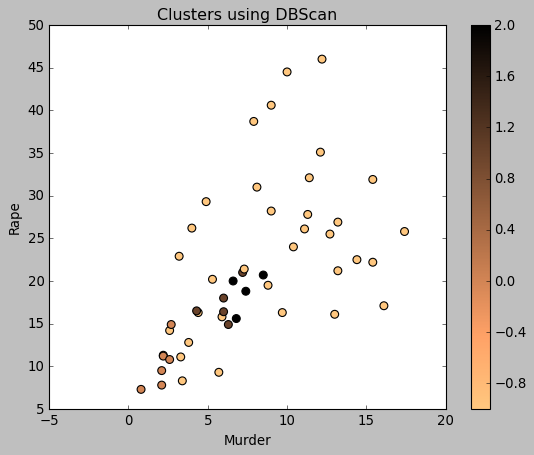

In [23]:
df1.plot(x="Murder",y ="Rape",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')   

In [24]:
dl = dbscan.labels_   #number of clusters formed

In [25]:
sklearn.metrics.silhouette_score(X, dl) 

<IPython.core.display.Javascript object>

0.009897729296912272

##### The silhouette score for this model is very poor. The clusters formed are overlapping.

# Model 2: Changing eps values.

In [26]:
x=df2.iloc[:,0:].values

x

array([[ 13.2, 236. ,  21.2],
       [ 10. , 263. ,  44.5],
       [  8.1, 294. ,  31. ],
       [  8.8, 190. ,  19.5],
       [  9. , 276. ,  40.6],
       [  7.9, 204. ,  38.7],
       [  3.3, 110. ,  11.1],
       [  5.9, 238. ,  15.8],
       [ 15.4, 335. ,  31.9],
       [ 17.4, 211. ,  25.8],
       [  5.3,  46. ,  20.2],
       [  2.6, 120. ,  14.2],
       [ 10.4, 249. ,  24. ],
       [  7.2, 113. ,  21. ],
       [  2.2,  56. ,  11.3],
       [  6. , 115. ,  18. ],
       [  9.7, 109. ,  16.3],
       [ 15.4, 249. ,  22.2],
       [  2.1,  83. ,   7.8],
       [ 11.3, 300. ,  27.8],
       [  4.4, 149. ,  16.3],
       [ 12.1, 255. ,  35.1],
       [  2.7,  72. ,  14.9],
       [ 16.1, 259. ,  17.1],
       [  9. , 178. ,  28.2],
       [  6. , 109. ,  16.4],
       [  4.3, 102. ,  16.5],
       [ 12.2, 252. ,  46. ],
       [  2.1,  57. ,   9.5],
       [  7.4, 159. ,  18.8],
       [ 11.4, 285. ,  32.1],
       [ 11.1, 254. ,  26.1],
       [ 13. , 337. ,  16.1],
       [  

In [27]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=25,min_samples=4,metric='euclidean')

model=db.fit(x)


In [28]:
label=model.labels_
label

array([ 0,  0,  0,  1,  0,  1,  2,  0, -1,  1,  2,  2,  0,  2,  2,  2,  2,
        0,  2,  0,  1,  0,  2,  0,  1,  2,  2,  0,  2,  1,  0,  0, -1,  2,
        2,  1,  1,  2,  1,  0,  2,  1,  1,  2,  2,  1,  1,  2,  2,  1],
      dtype=int64)

In [29]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 3


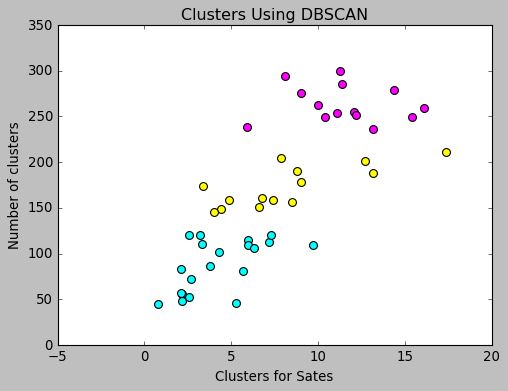

In [32]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.xlabel('Clusters for Sates')
plt.ylabel('Number of clusters')
plt.title('Clusters Using DBSCAN')
plt.show()

In [31]:
sklearn.metrics.silhouette_score(x, label) #performance of model

<IPython.core.display.Javascript object>

0.5705681453446093

**<li>The number of clusters formed has improved. Three clusters.**
**<li>This time we can see that the silhouette score has also improved.**
**<li>To get a better silhouette score we will need to put in optimum value of eps and min_samples.** 
